In [3]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [14]:
tf.__version__

'2.0.2'

In [16]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
logdir='log'

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1469 - accuracy: 0.9540 - val_loss: 0.0451 - val_accuracy: 0.9856
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0300 - val_accuracy: 0.9903
Epoch 3/5
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0308 - val_accuracy: 0.9895
Epoch 4/5
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0350 - val_accuracy: 0.9886
Epoch 5/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0289 - val_accuracy: 0.9909


In [25]:
y_true=test_labels

y_pred=model.predict(test_images) 
y_pred=np.argmax(y_pred,axis=1)

In [26]:
classes=[0,1,2,3,4,5,6,7,8,9]

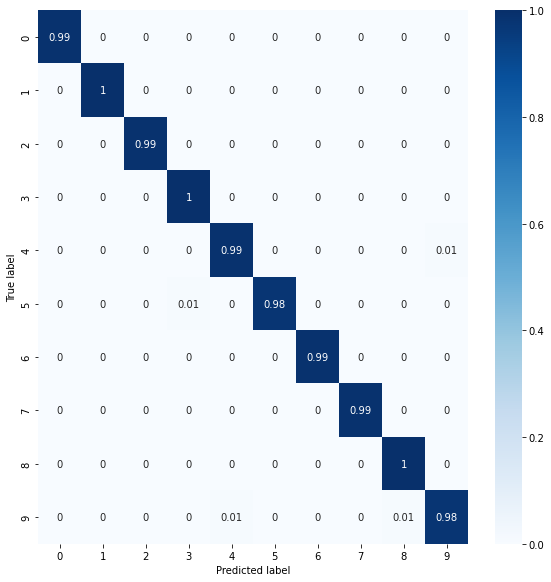

In [27]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
FP = con_mat.sum(axis=0) - np.diag(con_mat) 
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)
total_itens = 10000

In [29]:
acuracia =  (VP + VN)/(FP + FN + VP + VN)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
precisao = VP/(VP+FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score>

In [30]:
print("Verdadeiros Positivos: ", VP)
print("\nFalsos Positivos: ", FP)
print("\nVerdadeiros Negativos: ", VN)
print("\nFalsos Negativos: ", FN)

Verdadeiros Positivos:  [ 973 1133 1022 1006  977  873  947 1021  972  985]

Falsos Positivos:  [ 2  3  4 17 12  3  6 12 18 14]

Verdadeiros Negativos:  [9018 8862 8964 8973 9006 9105 9036 8960 9008 8977]

Falsos Negativos:  [ 7  2 10  4  5 19 11  7  2 24]


In [31]:
print ("\nAcuracia: ", acuracia)
print ("\nSensibilidade: ", sensibilidade)
print ("\nEspecificidade: ", especificidade)
print ("\nPrecisão: ", precisao)
print ("\nf_score: ", f_score)


Acuracia:  [0.9991 0.9995 0.9986 0.9979 0.9983 0.9978 0.9983 0.9981 0.998  0.9962]

Sensibilidade:  [0.99285714 0.99823789 0.99031008 0.9960396  0.99490835 0.97869955
 0.98851775 0.99319066 0.99794661 0.97621407]

Especificidade:  [0.99977827 0.99966159 0.99955397 0.99810901 0.99866933 0.99967062
 0.99933643 0.99866251 0.99800576 0.99844289]

Precisão:  [0.99794872 0.99735915 0.99610136 0.98338221 0.98786653 0.99657534
 0.99370409 0.98838335 0.98181818 0.98598599]

f_score:  [0.99539642 0.99779833 0.99319728 0.98967044 0.99137494 0.98755656
 0.99110413 0.99078117 0.9898167  0.9810757 ]


In [33]:
def plot_roc_curve(sensibilidade, especificidade):
    plt.plot(sensibilidade, especificidade, color='blue', label='ROC')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

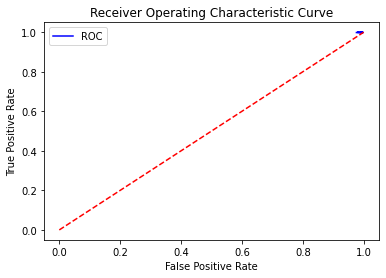

In [34]:
plot_roc_curve(sensibilidade,especificidade)